<a href="https://colab.research.google.com/github/mridulbiswas402/Bankloan_modelling/blob/master/onlineshopperintention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn import feature_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import naive_bayes

from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


Data loading and cleaning


In [ ]:
df=pd.read_csv("shopintention.csv")
df.dropna(inplace=True)
dic={"Administrative":"adim","Administrative_Duration":"admindur","Informational":"info","Informational_Duration":"infodur","ProductRelated":"PR","ProductRelated_Duration":"PRdur","BounceRates":"BR","ExitRates":"ER","OperatingSystems":"OS"}
df.rename(columns=dic,inplace=True)
u=df.Revenue.unique()
revdict={k:index for index, k in enumerate(u,0)}
df.Revenue.replace(revdict,inplace=True)
u=df.Weekend.unique()
weedict={k:index for index, k in enumerate(u,0)}
df.Weekend.replace(weedict,inplace=True) 
l={"Returning_Visitor":1,"New_Visitor":2,"Other":0}
df.VisitorType.replace(l,inplace=True) 
l={"Jan":1,"Feb":2,"Mar":3,"April":4,"May":5,"June":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
df.Month.replace(l,inplace=True)
df=df[~(df.admindur==-1)]

Data analysis and visualization

In [ ]:
def brief_info():
    discols=[]
    conticols=[]
    print(df.info())
    print(df.shape)
    print(df.describe())
    print('Discrete columns are:')
    for cols in df.columns:
        if (df[cols].dtypes)=='int64':
            discols=discols+[cols]
    print(discols)       
    print('\n__________________________')
    print('Continous Columns are:')
    for cols in df.columns:
        if (df[cols].dtypes)!='int64':
            conticols=conticols+[cols]
    print(conticols)       
    return discols,conticols 
ld,lc=brief_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 18 columns):
adim           12283 non-null float64
admindur       12283 non-null float64
info           12283 non-null float64
infodur        12283 non-null float64
PR             12283 non-null float64
PRdur          12283 non-null float64
BR             12283 non-null float64
ER             12283 non-null float64
PageValues     12283 non-null float64
SpecialDay     12283 non-null float64
Month          12283 non-null int64
OS             12283 non-null int64
Browser        12283 non-null int64
Region         12283 non-null int64
TrafficType    12283 non-null int64
VisitorType    12283 non-null int64
Weekend        12283 non-null int64
Revenue        12283 non-null int64
dtypes: float64(10), int64(8)
memory usage: 2.1 MB
None
(12283, 18)
               adim      admindur          info       infodur            PR  \
count  12283.000000  12283.000000  12283.000000  12283.000000  12283.000000 

In [ ]:
df.corr().Revenue  # this shows that traffictype is the least corr with rev and page value is the most corr with rev

adim           0.137970
admindur       0.092911
info           0.094672
infodur        0.069984
PR             0.157624
PRdur          0.151528
BR            -0.149348
ER            -0.206145
PageValues     0.492317
SpecialDay    -0.082632
Month          0.125913
OS            -0.014841
Browser        0.024063
Region        -0.011575
TrafficType   -0.005378
VisitorType    0.098167
Weekend        0.028937
Revenue        1.000000
erbr          -0.181911
Name: Revenue, dtype: float64

In [ ]:
def coltype(df):
    discols=[]
    conticols=[]
    #print('Discrete columns are:')
    for cols in df.columns:
        if (df[cols].dtypes)=='int64':
            discols=discols+[cols]
           
    #print('\n__________________________')
    #print('Continous Columns are:')
    for cols in df.columns:
        if (df[cols].dtypes)!='int64':
            conticols=conticols+[cols]
           
    return discols,conticols


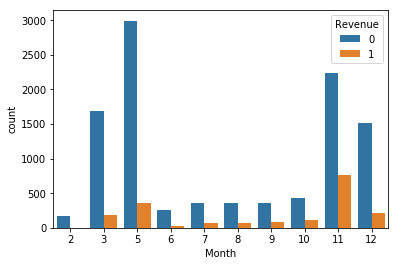

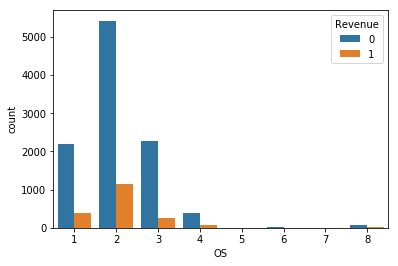

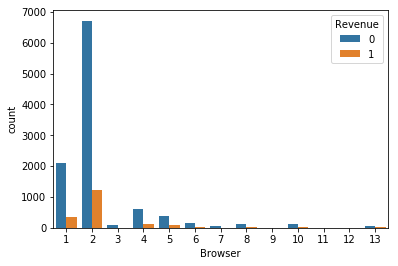

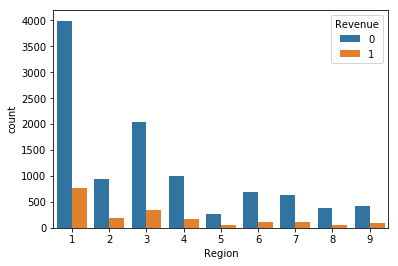

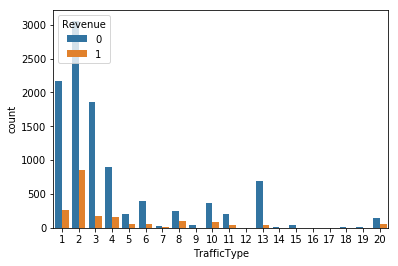

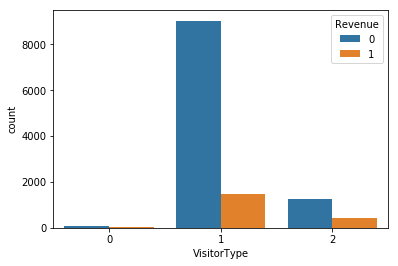

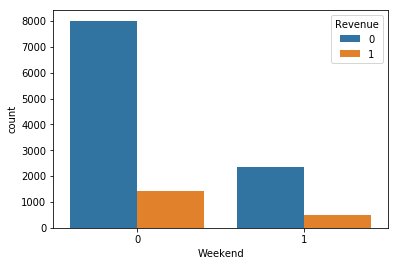

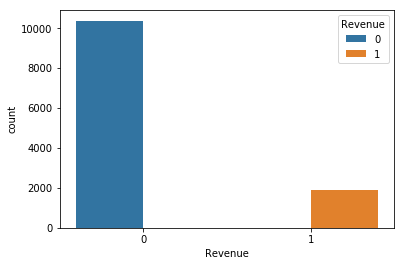

In [ ]:
def showcount(dislist):
    l1=dislist
    for i in l1:
        sns.countplot(x=i,hue="Revenue",data=df)
        plt.show()
showcount(ld)      

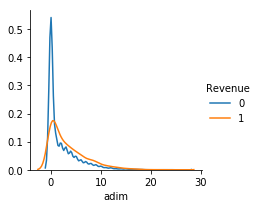

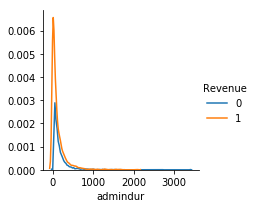

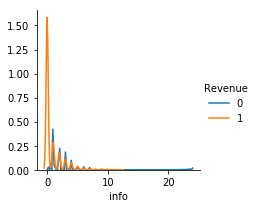

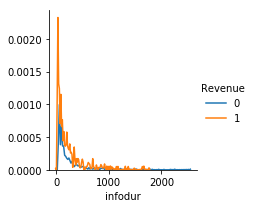

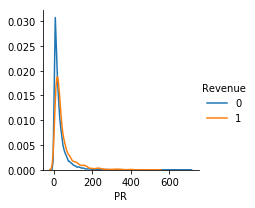

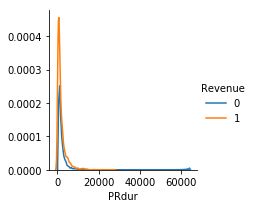

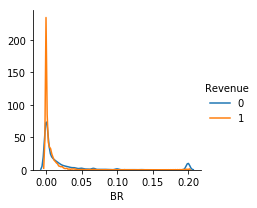

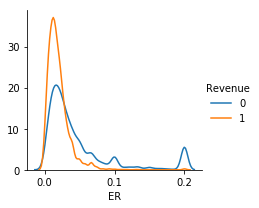

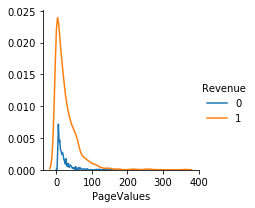

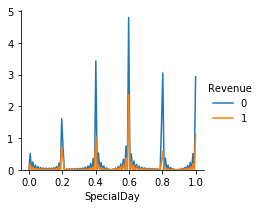

In [ ]:
def showdist(dislist):
    l1=dislist
    for i in l1:
        fig=sns.FacetGrid(data=df,hue="Revenue")
        fig.map(sns.kdeplot,i)
        fig.add_legend()
        plt.show()
showdist(lc)

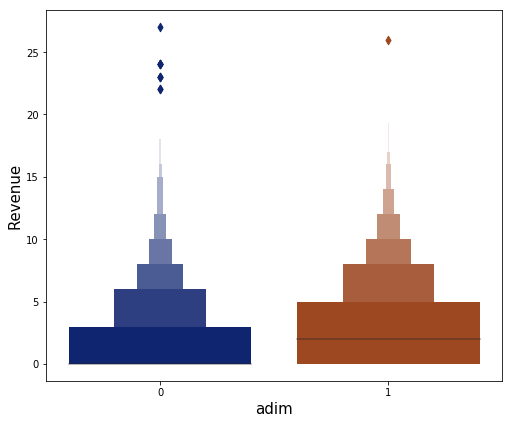

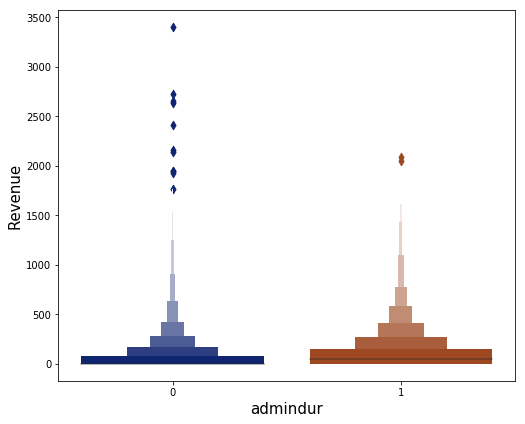

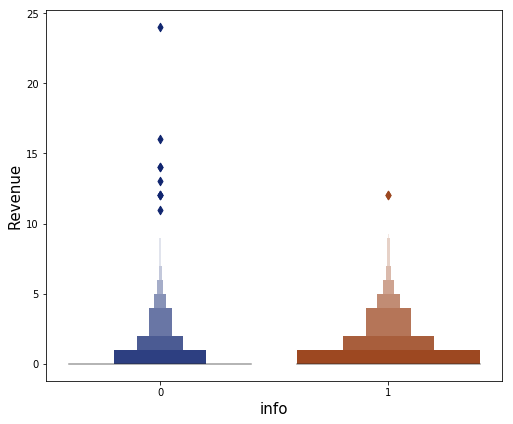

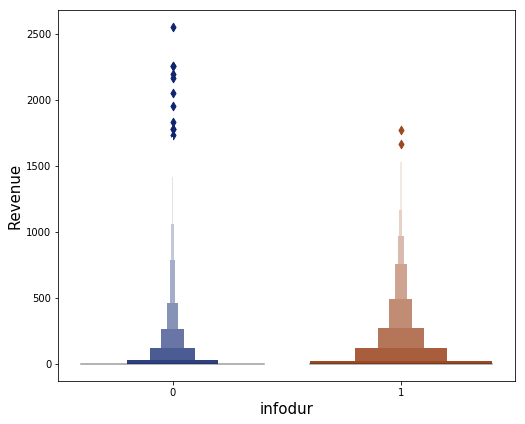

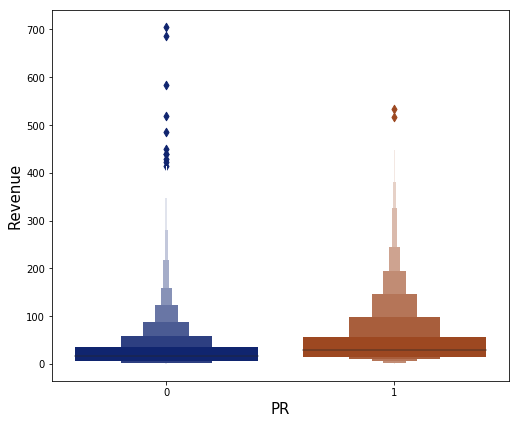

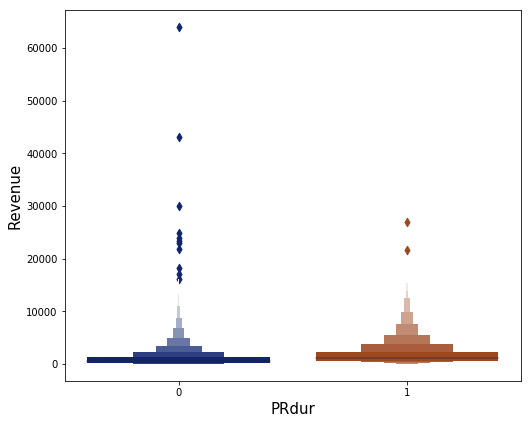

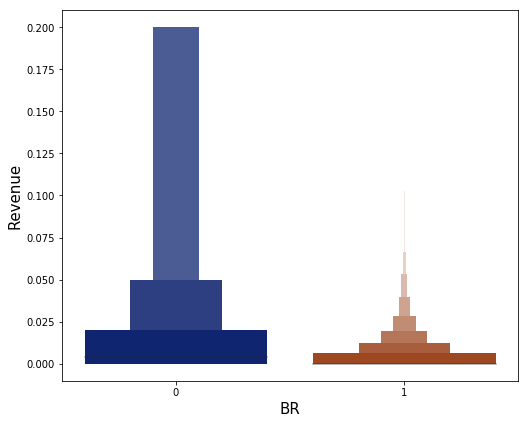

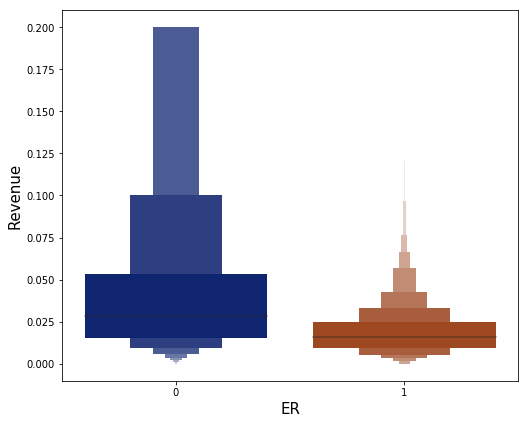

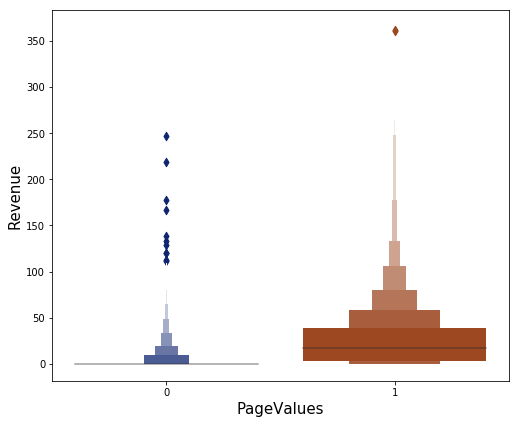

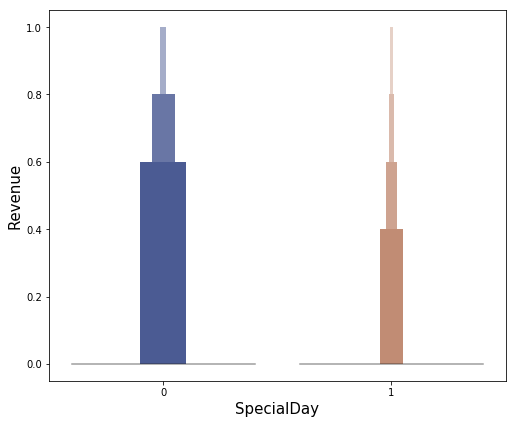

In [ ]:
for i in lc:
    plt.rcParams['figure.figsize'] = (18, 15)

    plt.subplot(2, 2, 1)
    sns.boxenplot(df['Revenue'], df[i], palette = 'dark')
    #plt.title(i 'vs Revenue', fontsize = 30)
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Revenue', fontsize = 15)
    plt.show()

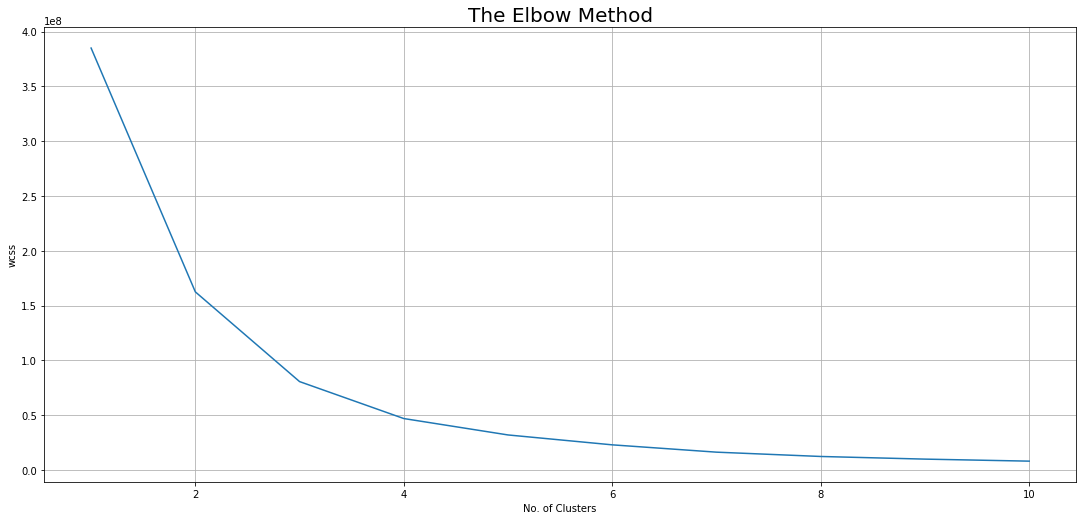

In [ ]:
#The Elbow Method to Find out the Maximum no. of Optimal Clusters
x = df.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three. 
#Let's go to the next step, i.e., Plotting the Clusters.

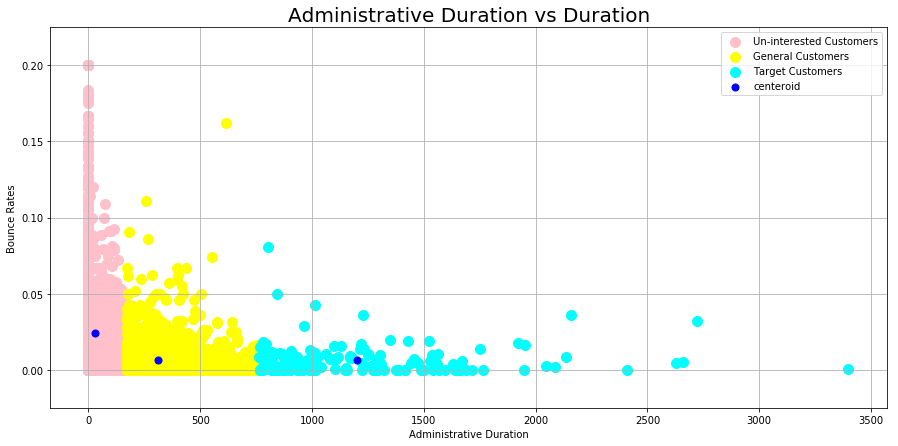

In [ ]:
#Visualizing the Cluster using Scatter Plot.
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()
# By, Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.
#There are Three Groups, The Pink Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from a w

Feature selection


In [ ]:
df1=df
Xdf=df1.drop("Revenue",axis=1)
ydf=df1["Revenue"]
dis,conti=coltype(Xdf)

In [ ]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
def Most_imp_feature(Xtrain,ytrain):
    mi=feature_selection.mutual_info_classif(Xtrain,ytrain)
    miser=pd.Series(mi)
    miser.index=Xtrain.columns.values
    m=miser.sort_values(ascending=False)
    robj=ensemble.RandomForestClassifier(n_estimators=200)
    robj.fit(Xtrain,ytrain)
    ser1=pd.Series(robj.feature_importances_)
    ser1.index=Xtrain.columns.values
    r=ser1.sort_values(ascending=False)
    rfeobj=feature_selection.RFE(estimator=linear_model.LogisticRegression(C=100,penalty="l1"),n_features_to_select=10)
    a=rfeobj.fit_transform(Xtrain,ytrain)
    f=list(Xtrain.columns[rfeobj.get_support()])
    lst1=[]
    for i in range(0,10):
        lst1=lst1+[m.index[i]]
    lst2=[]
    for i in range(0,10):
        lst2=lst2+[r.index[i]]
    
    intsec=intersection(lst1, lst2)
    
    impfeature=intersection(intsec, f)
    
    return impfeature
mif=Most_imp_feature(Xdf,ydf)    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [ ]:
mif

['PageValues', 'ER', 'BR', 'Month']

In [ ]:
def Chi2(Xtraindis,ytrain,dis):
    chiarr,parr=feature_selection.chi2(Xtraindis,ytrain)      # chi2 test for discrete values
    cols=dis
    ser=pd.Series(chiarr)
    ser.index=cols
    ch=ser.sort_values(ascending=False)
    lst1=[]
    for i in range(int(len(cols)/2)):
            lst1=lst1+[ch.index[i]]
    return lst1    

In [ ]:
ch=Chi2(Xdf[dis],ydf,dis)

In [ ]:
ch

['Month', 'VisitorType', 'Browser']

In [ ]:
# variance threshold
threshold=feature_selection.VarianceThreshold(threshold=100)
X_high_var=threshold.fit_transform(Xdf)
f=list(Xdf.columns[threshold.get_support()])

In [ ]:
f

['admindur', 'infodur', 'PR', 'PRdur', 'PageValues']

Data engg

In [ ]:
df2=df1[list(set().union(f,mif))]


In [ ]:
X1=df2
y1=df.Revenue

In [ ]:
def modeltest(X,y,ts,rs):
        Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=ts,random_state=rs)
        model = ensemble.RandomForestClassifier()
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtest)
        print("recall :",metrics.recall_score(ytest,ypred))
        print("acc :",metrics.accuracy_score(ytest,ypred))
        print("roc :",metrics.roc_auc_score(ytest,ypred))
        print("logloss:",metrics.log_loss(ytest,ypred))
        Auc_curve(model,Xtest,ytest,ypred)

In [ ]:
modeltest(X1,y1,.25,3)

recall : 0.5280665280665281
acc : 0.8990556821882123
roc : 0.7480100980100981
logloss: 3.486514831979492


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
df3=df2
df3["erbr"]=(df3["ER"]+df3["BR"])/2
df3=df3.drop(["ER","BR"],axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
X2=df3
y2=df.Revenue
modeltest(X2,y2,.25,55)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


recall : 0.5280172413793104
acc : 0.8964506675350049
roc : 0.7450212789175034
logloss: 3.5764930165181337


In [ ]:
df4=df
df["erbr"]=(df["ER"]+df["BR"])/2
df=df.drop(["ER","BR"],axis=1)
df["ad/dur"]=df["admindur"]/df["adim"]
df["info/dur"]=df["infodur"]/df["info"]
df["pr/dur"]=df["PRdur"]/df["PR"]
df=df.fillna(0)
df=df.drop(["adim","info","PR","OS","Browser","Region","TrafficType","SpecialDay","admindur","PRdur","infodur"],axis=1)

In [ ]:
X=df.drop(["VisitorType","Revenue","Weekend","info/dur"],axis=1)
y=df.Revenue

In [ ]:
modeltest(X,y,.25,18)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


recall : 0.520242914979757
acc : 0.8873331162487789
roc : 0.7389728350606973
logloss: 3.8914046853660014


In [ ]:
def modelvar(X,y,ts,rs):
        Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=ts,random_state=rs)
        model = ensemble.RandomForestClassifier()
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtest)
        roc=metrics.roc_auc_score(ytest,ypred)
        return roc

In [ ]:
a=[]
for i in range(1,20):
        
        r=modelvar(X,y,.25,i)
        a=a+[r]
    
    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

In [ ]:
np.std(a)

0.007659357317033925

In [ ]:
# function to show the roc curve 
def Auc_curve(model,Xtest,ytest,ypredicted):
    #import sklearn.metrics as metrics
    probs = model.predict_proba(Xtest)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(ytest, ypredicted)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    #import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


recall : 0.5093555093555093
acc : 0.895799413871703
roc : 0.7384615384615385
logloss: 3.5989826156156157


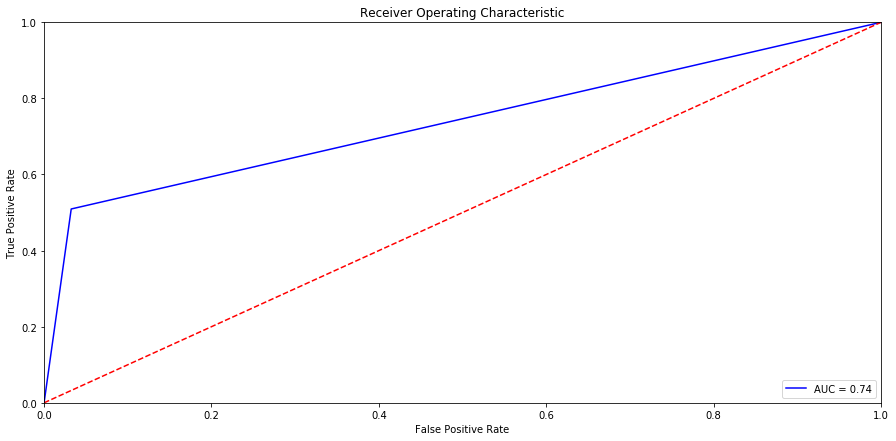

In [ ]:
modeltest(X1,y1,.25,3)